<a href="https://colab.research.google.com/github/trungphan9x/ML_project1/blob/master/trung_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS582 Machine Learning - Mini Project 1

Professor: Anthony Sander

Team:


*   Khoa Nam Nguyen
*   Thai Trung Phan

Dataset: https://www.kaggle.com/camnugent/california-housing-prices



# Loading all libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# STEP 1: LOADING DATASET

Min of 500 samples , must include at least one categorical feature

In [2]:
!git clone https://github.com/trungphan9x/ML_project1.git

Cloning into 'ML_project1'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 58 (delta 27), reused 24 (delta 6), pack-reused 0
Unpacking objects: 100% (58/58), done.


In [3]:
housing = pd.read_csv('/content/ML_project1/dataset/Cali_housing_prices/housing.csv')

# STEP 2: EDA

# Identify if there are any missing values


> There are 20,640 instances in the dataset. Notice that the total_bed rooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this.






In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Identify categorical feature



> All attributes are numerical, except the ocean_proximity field. When you looked at the top five rows, you probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute 

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY




> Check what categories exist and how many districts belong to each category



In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Summary of the numerical atributes

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Ploting a histogram of each numerical atribute

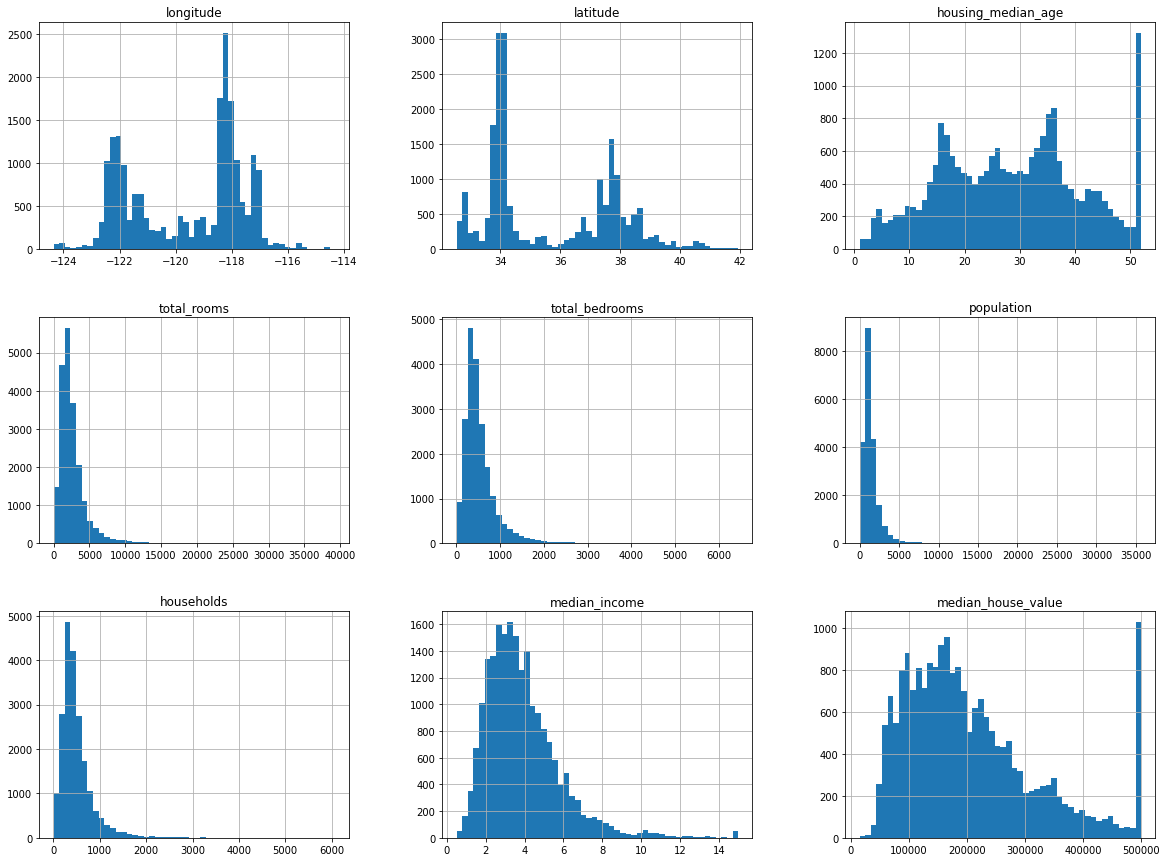

In [8]:
housing.hist(bins=50, figsize=(20,15)) 
plt.show()



> There are a few things you might notice in these histograms:


1.   The median house value is our target attribute (our labels).
2.   The median income attribute: the numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000).
3.   These attributes have very different scales.
4.   Finally, many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.






# Visualizing Geographical Data

Create a scatterplot of all districts to visualize the data

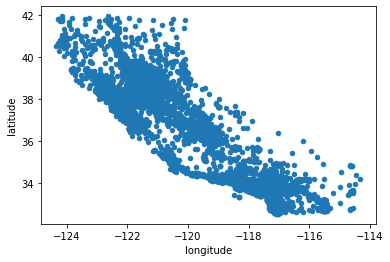

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude")

This looks like California actually. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points:

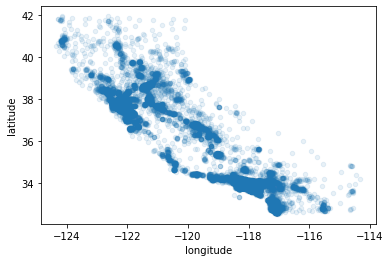

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Now that’s much better: you can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.


Now let’s look at the housing prices (Figure 2-13). The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):

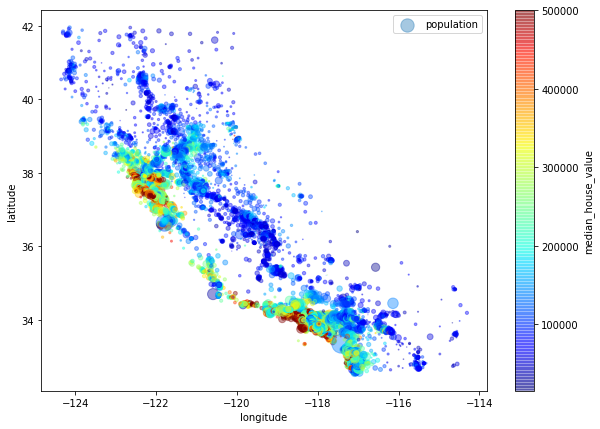

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density. A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

# Correlations

In [12]:
corr_matrix = housing.corr()

Now let’s look at how much each attribute correlates with the median house value:

In [13]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up

When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north).

Another way to check for correlation between attributes is to use the pandas scatter_matrix() function

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4332e6db50>,
      dtype=object)

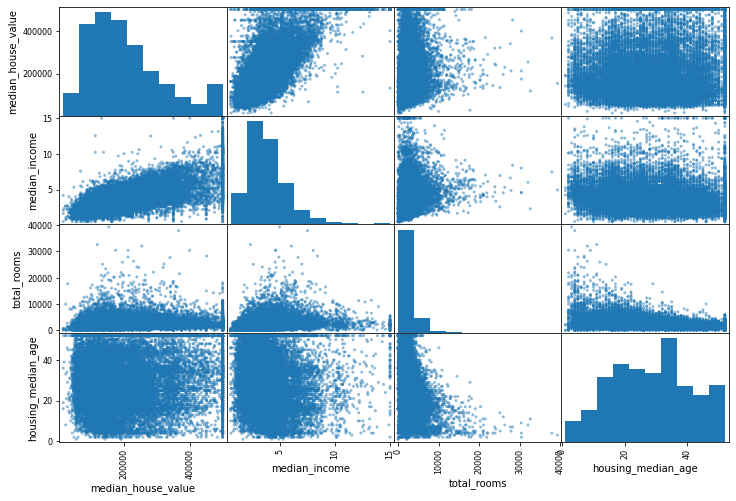

In [14]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

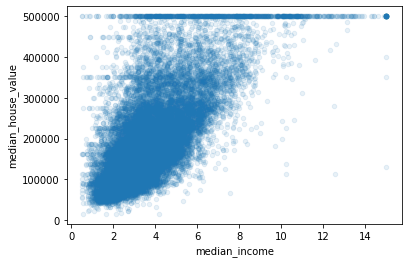

In [15]:
 housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# Atribute Combination

In [16]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.

Apparently houses with a lower bedroom/room ratio tend to be more expensive. 

The larger the houses, the more expensive they are.

# STEP 3: DATA PREPARATION

# Create a testset

The median income is a very important attribute to predict median housing prices. We may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. So we are gonna create an income category attribute with five categories:

In [19]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

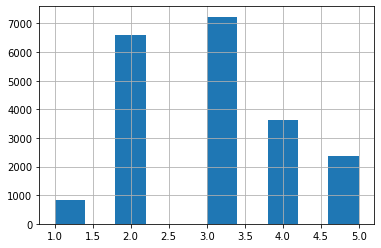

In [20]:
 housing["income_cat"].hist()

In [21]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [22]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
        strat_train_set = housing.loc[train_index]
        strat_test_set = housing.loc[test_index]

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [24]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

Then remove the income_cat attribute so the data is back to its original

In [25]:
for set_ in (strat_train_set, strat_test_set): 
  set_.drop("income_cat", axis=1, inplace=True)
  # np.where(set_["median_house_value"]>250000.0,1,0)

Separate the predictors and the labels, since we don’t necessarily want to apply the same transformations to the predictors and the target values:

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Convert Regression dataset to Binary Classification dataset

In [27]:
housing_labels = np.where(housing_labels>250000.0,1,0)
housing_labels

array([1, 1, 0, ..., 0, 0, 1])

#  Processing missing values

Create a SimpleImputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

In [28]:
imputer = SimpleImputer(strategy="median")

The median can only be computed on numerical attributes, you need to create a copy of the data without the text attribute ocean_proximity:

In [29]:
housing_num = housing.drop("ocean_proximity", axis=1)

Fit the imputer instance to the training data using the fit() method:

In [30]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [31]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

Use this “trained” imputer to transform the training set by replacing missing values with the learned medians:

In [32]:
X = imputer.transform(housing_num)

The result is a plain NumPy array containing the transformed features. If you want to put it back into a pandas DataFrame, it’s simple:

In [33]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [34]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16512 non-null  float64
 10  population_per_household  16512 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


# Handling Text and Categorical Attributes

In [35]:
housing_cat = housing[["ocean_proximity"]]

In [36]:
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Most Machine Learn‐ ing algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OneHotEncoder class:

In [37]:
cat_encoder = OneHotEncoder()

In [38]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [39]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [41]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Add Combined Atributes 

In [42]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names] # get the column indices

In [43]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)

In [44]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household", "bedrooms_per_room"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household,bedrooms_per_room
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,0.223852,2.0944,4.62537,2.0944,0.223852
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,0.159057,2.70796,6.00885,2.70796,0.159057
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,0.241291,2.02597,4.22511,2.02597,0.241291
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,0.200866,4.13598,5.23229,4.13598,0.200866
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,0.231341,3.04785,4.50581,3.04785,0.231341


# Transformation Pipiline 


Now let's build a pipeline for preprocessing the numerical attributes:

In [45]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [46]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

# Handle the categorical columns and the numerical columns together

In [47]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

# STEP 4: MODEL TUNING

Using GridSearchCV to find a great combination of hyperparameter values

In [48]:
from sklearn.model_selection import GridSearchCV
def best_estimator(estimator,param_grid,X,y,cv):
  grid = GridSearchCV(estimator, param_grid, cv = cv, scoring = 'accuracy', n_jobs=-1)
  grid.fit(X,y)
  best_estimator = grid.best_estimator_
  best_score = grid.best_score_
  print(f'Best score: {grid.best_score_}')
  print(grid.best_estimator_)
  return best_estimator, best_score

Plot learning curve

In [49]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, axe=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axe is None:
        _, axe = plt.subplots(figsize=(20, 5))

    plt.title("Learning Curve with "+ title)
    axe.set_xlabel("Training examples")
    axe.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axe.grid()
    axe.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axe.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axe.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axe.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axe.legend(loc="best")

    return plt


In [83]:

from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, title, X, y, param_name=None, param_range=None, cv= None, n_jobs=None):
  train_scores, test_scores = validation_curve(
      estimator, X, y, param_name=param_name, param_range=param_range,
      scoring="accuracy", n_jobs=1)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.subplots(figsize=(20, 5))
  plt.title("Validation Curve with "+ title)
  plt.xlabel(param_name)
  plt.ylabel("Score")
  plt.ylim(0.0, 1.1)
  lw = 2
  plt.semilogx(param_range, train_scores_mean, label="Training score",
              color="darkorange", lw=lw)
  plt.fill_between(param_range, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.2,
                  color="darkorange", lw=lw)
  plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
              color="navy", lw=lw)
  plt.fill_between(param_range, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.2,
                  color="navy", lw=lw)
  plt.legend(loc="best")
  plt.show()


# 1) SVC

In [51]:
from sklearn.svm import SVC
param_svc = {
    'C': [0.001, 0.1, 1, 10, 100] #regularization factor
}
svc_estimator, svc_score = best_estimator(SVC(), param_svc, housing_prepared, housing_labels, 5) 

Best score: 0.8900798110779016
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

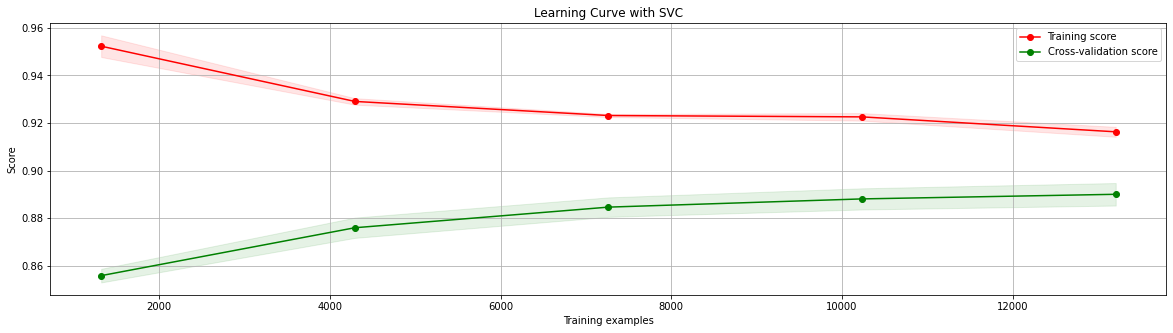

In [52]:
plot_learning_curve(svc_estimator, "SVC", housing_prepared, housing_labels)

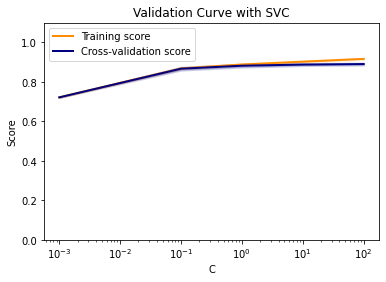

In [71]:
plot_validation_curve(svc_estimator, "SVC", housing_prepared, housing_labels, param_name="C", param_range=[0.001, 0.1, 1, 10, 100])

# 2) KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1,30)
param_knn = dict(n_neighbors = k_range)
knn_estimator, knn_score = best_estimator(KNeighborsClassifier(), param_knn, housing_prepared, housing_labels, 5)

Best score: 0.865128300484133
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

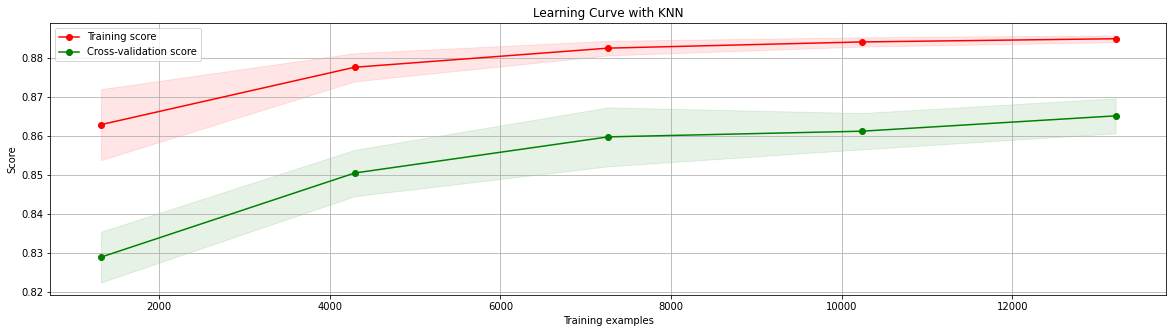

In [56]:
plot_learning_curve(knn_estimator, "KNN", housing_prepared, housing_labels)

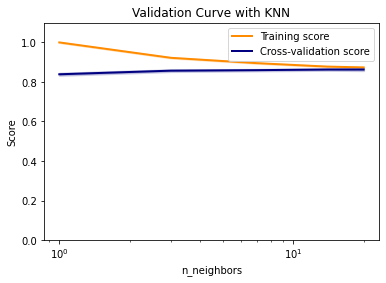

In [72]:
param_range = [1,3,7,14,20]
plot_validation_curve(knn_estimator, "KNN", housing_prepared, housing_labels, param_name="n_neighbors", param_range = param_range)

# 3) Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
log_params = {
    'C': np.logspace(-3,3,7),
    'penalty':['l1','l2']# l1 lasso l2 ridge
}
log_estimator,log_score = best_estimator(LogisticRegression(max_iter=1000), log_params,housing_prepared, housing_labels,5)

Best score: 0.8713058242483891
LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

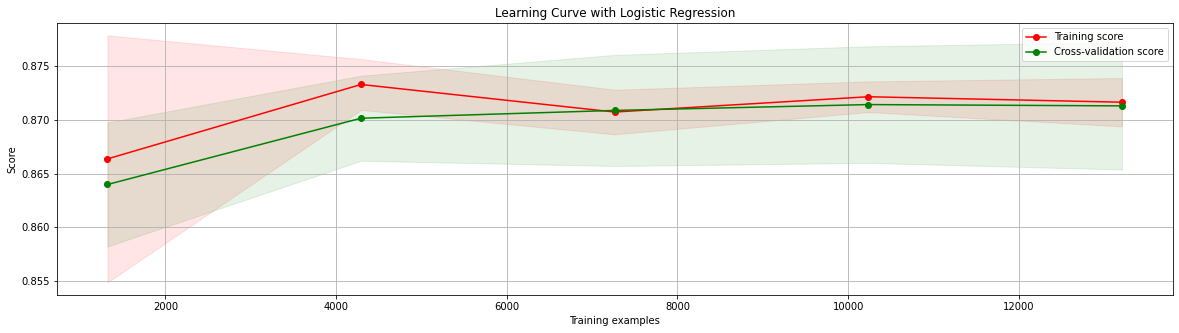

In [65]:
plot_learning_curve(log_estimator, "Logistic Regression", housing_prepared, housing_labels)

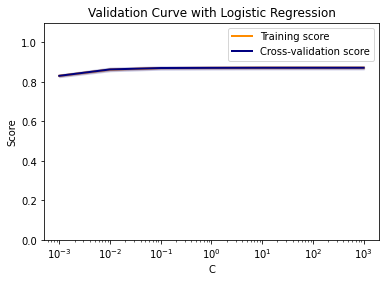

In [70]:
param_range = np.logspace(-3,3,7)
plot_validation_curve(log_estimator, "Logistic Regression", housing_prepared, housing_labels, param_name="C", param_range = param_range)

# 4) Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtree_params = {
     'max_depth':np.arange(1,20)
}
dt_estimator,dt_score = best_estimator(DecisionTreeClassifier(), dtree_params, housing_prepared, housing_labels, 5)

Best score: 0.8722749705542728
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

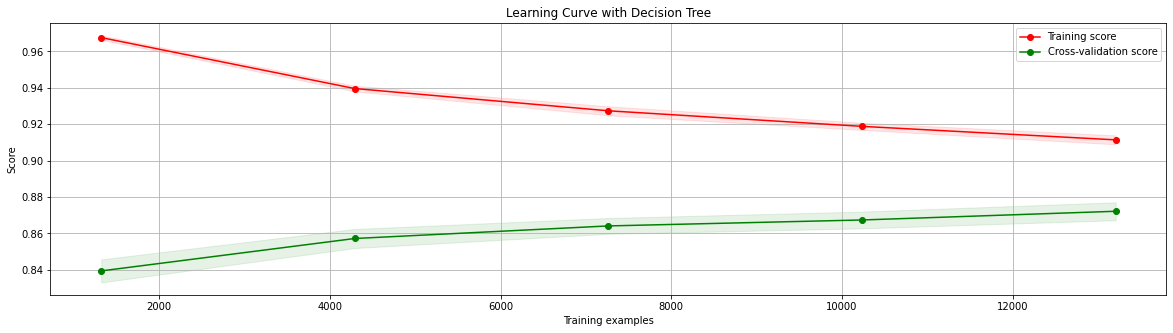

In [76]:
plot_learning_curve(dt_estimator, "Decision Tree", housing_prepared, housing_labels)

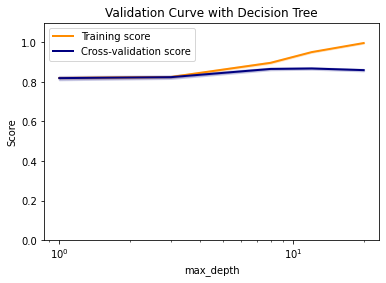

In [77]:
param_range = [1,3,8,12,20]
plot_validation_curve(dt_estimator, "Decision Tree", housing_prepared, housing_labels, param_name="max_depth", param_range = param_range)

# 5) MLP

In [80]:
from sklearn.neural_network import MLPClassifier
mlp_params = {
    'hidden_layer_sizes': [(5,),(10,),(20,)]
}
mlp_estimator, mlp_score = best_estimator(MLPClassifier(max_iter=300), mlp_params, housing_prepared, housing_labels, 5)

Best score: 0.8869915259754132
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

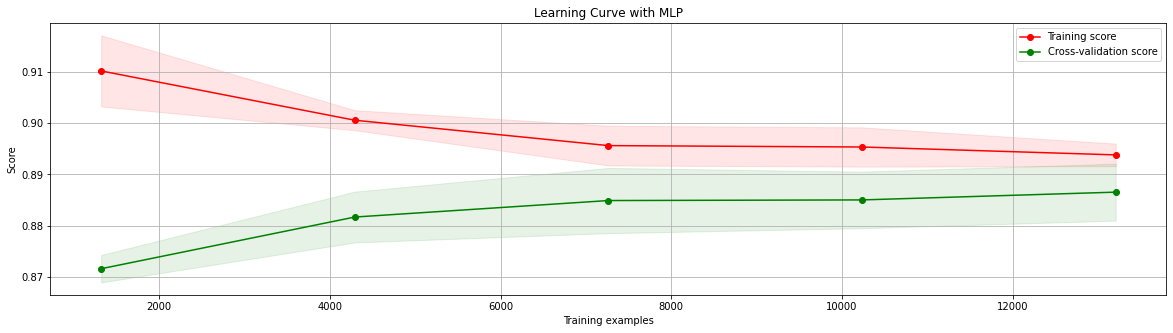

In [81]:
plot_learning_curve(mlp_estimator, "MLP", housing_prepared, housing_labels)

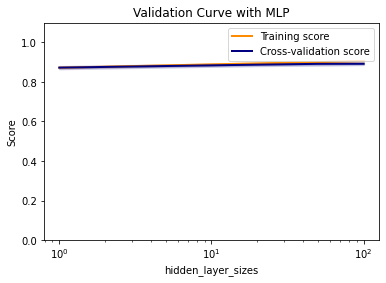

In [82]:
param_range = [1, 20, 50,100]
plot_validation_curve(mlp_estimator, "MLP", housing_prepared, housing_labels, param_name="hidden_layer_sizes", param_range = param_range)

# 6) Ensemble - Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
rForest = [
        {'n_estimators': [3, 10, 30, 50, 80, 100, 500], 'max_features': [2, 4, 6, 8, 10, 12]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
rf_estimator, rf_score = best_estimator(RandomForestClassifier(), rForest, housing_prepared, housing_labels, 5)

Best score: 0.9000729106095022
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
plot_learning_curve(rf_estimator, "Random Forest Classifier", housing_prepared, housing_labels)

In [ ]:
param_range = [3, 10, 30, 50, 80, 100, 500]
plot_validation_curve(rf_estimator, "Random Forest Classifier", housing_prepared, housing_labels, param_name="n_estimators", param_range = param_range)